<center>
<h1>Analisi delle vendite dei videogiochi nel mondo</h1>
<p>Antonio Pelusi</p>
<p>Matricola: 182267</p>
<p>257241@studenti.unimore.it</p>
</center>

## Indice
0. **Introduzione**

1. **Collezione dei dati**

    - Dataset vendite videogiochi

    - Dataset vendite console

2. **Elaborazione dei dati**

    - Pulizia dei dataset

    - Controllo validità delle vendite globali

3. **Analisi esplorativa**
    
    - Dataset videogames
    
    - Dataset consoles

4. **Testing**
    - Calcolo della correlazione tra consoles con più videogiochi popolari e console più popolari

    - d
    
5. **Risultati e conclusioni**

---

## **Introduzione**
Nel lontano 1962, un gruppo di studenti del *Massachussetts Institute of Technology* sviluppò un gioco chiamato *Spacewar!* sul computer DEC PDP-1.

Il gioco fu presto incluso in tutti i nuovi computer DEC, diventando così il primo videogioco della storia largamente distribuito.

Da allora, il settore videoludico ha subito un processo di crescita costante, che va di pari passo con il progresso tecnologico dei computer stessi.

Il presente studio vuole raccogliere ed analizzare informazioni sulla crescita dei videogiochi dagli anni 80' (decennio della nascita delle prime console videoludiche) ad oggi in base alle copie vendute (sia continentali che globali), per poi confrontarle con la vendita di console, mettendone in risalto l'eventuale livello di correlazione.

---

## **1: Collezione dei dati**
Questa prima fase prevede la raccolta dei dati necessari all'analisi prevista.

Per lo studio appena introdotto, sarà necessario avere due datasets:
- Dataset contenente le informazioni sulle vendite dei videogiochi
- Dataset contenente le informazioni sulle vendite delle console

### Dataset vendite videogiochi
Per un'analisi corretta sarà necessario avere un dataset aggiornato.
Uno dei database di riferimento nel campo videoludico è [vgChartz.com](https://www.vgchartz.com/gamedb/).
Questo database viene costantemente aggiornato, ma non prevede il download del dataset.
Pertanto sarà necessario effettuare lo *scraping* della pagina web al fine di ottenere un dataset in un formato analizzabile (CSV, JSON ecc...).

Lo script utilizzato per lo *scraping* del database online [vgChartz.com](https://www.vgchartz.com/gamedb/) è stato sviluppato in Python sulla base dello script [vgChartScrape](https://github.com/GregorUT/vgchartzScrape) utilizzando la libreria Python [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/).

Essendo l'operazione di *scraping* dell'intero database molto dispendiosa a livello di tempo (~1 secondo per videogioco, per un totale di 16598 videogiochi, ~5 ore!), verrà fornito insieme al seguente notebook il dump del database in formato CSV, chiamato **vgsales.csv**, generato dallo script Python **vgchartz-scraper.py** appositamente sviluppato.

Il dataset ottenuto presenta la seguente struttura:

|Campi| Definizione|
|:-|:-|
|Rank|Valore unico, indica la posizione del videogioco nella classifica globale per vendite|
|Name|Nome del videogioco|
|Platform|Codice identificativo della console per cui è stato sviluppato il gioco|
|Year|Anno di rilascio del videogioco|
|Genre|Genere del videogioco|
|Publisher|Nome dell'editore del videogioco|
|NA_Sales|Vendite (in milioni) del videogioco in Nord America|
|EU_Sales|Vendite (in milioni) del videogioco in Europa|
|JP_Sales|Vendite (in milioni) del videogioco in Giappone|
|Other_Sales|Vendite (in milioni) del videogioco nel resto del mondo|
|Global_Sales|Vendite totali (in milioni) del videogoco|

### Dataset vendite console
Il secondo dataset contiene informazioni sulla vendita delle console nel mondo.
È scaricare e consultabile al seguente link: [Kaggle.com](https://www.kaggle.com/datasets/jaimepazlopes/game-console-manufactor-and-sales).

Questo dataset è stato ottenuto effettuando lo *scraping* della seguente pagina [Wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles).

Il dataset originale presenta la seguente struttura:

|Campi| Definizione|
|:-|:-|
|ConsoleID|Codice identificativo della console|
|Console_Name|Nome della console|
|Manufacturer|Produttore della console|
|Release_Year|Anno di rilascio della console|
|Sales|Vendite totali (in milioni) della console|
|Type|Tipo di console (Home/Handled)|

---

## **2: Elaborazione dei dati**
In questa fase verranno puliti e riorganizzati i dati.

Importazione librerie

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.simplefilter(action='ignore')


Importazione datasets:

In [2]:
videogames = pd.read_csv('vgsales.csv')
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
consoles = pd.read_csv('console.csv')
consoles.head()

,ConsoleID,Console_Name,Manufacturer,Release_Year,Sales,Type
0,PC,Personal Computer,Computer,1975,1000.00,Home
1,PS2,PlayStation 2,Sony,2000,155.00,Home
2,DS,Nintendo DS,Nintendo,2004,154.02,Handheld
3,GB,Game Boy,Nintendo,1989,118.69,Handheld
4,PS4,PlayStation 4,Sony,2013,108.90,Home


### Pulizia dei dataset


Controllo del numero dei records presenti nei datasets:

In [4]:
print("Numero di videogiochi registrati:\t", videogames.shape[0], "\nNumero di console registrate:\t\t", consoles.shape[0])

Numero di videogiochi registrati:	 16598 
Numero di console registrate:		 44


Controllo se tutti i records sono completi:

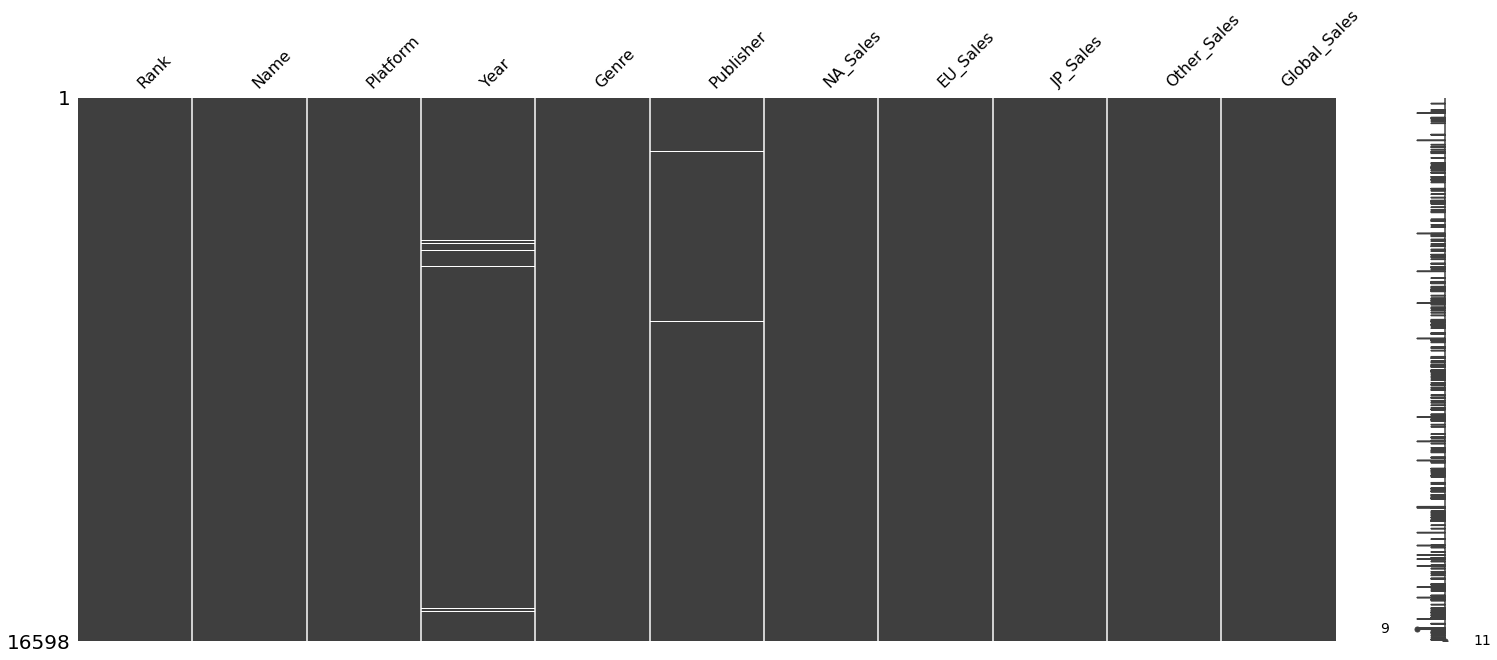

In [5]:
msno.matrix(videogames);

Come intuibile dalle colonne *Year* e *Publisher*, vi sono diversi valori mancanti.

Per avere risultati affidabili in fase di analisi, è necessario scartare questi records:

In [6]:
videogames.dropna(axis=0, how='any',inplace=True)

Test:

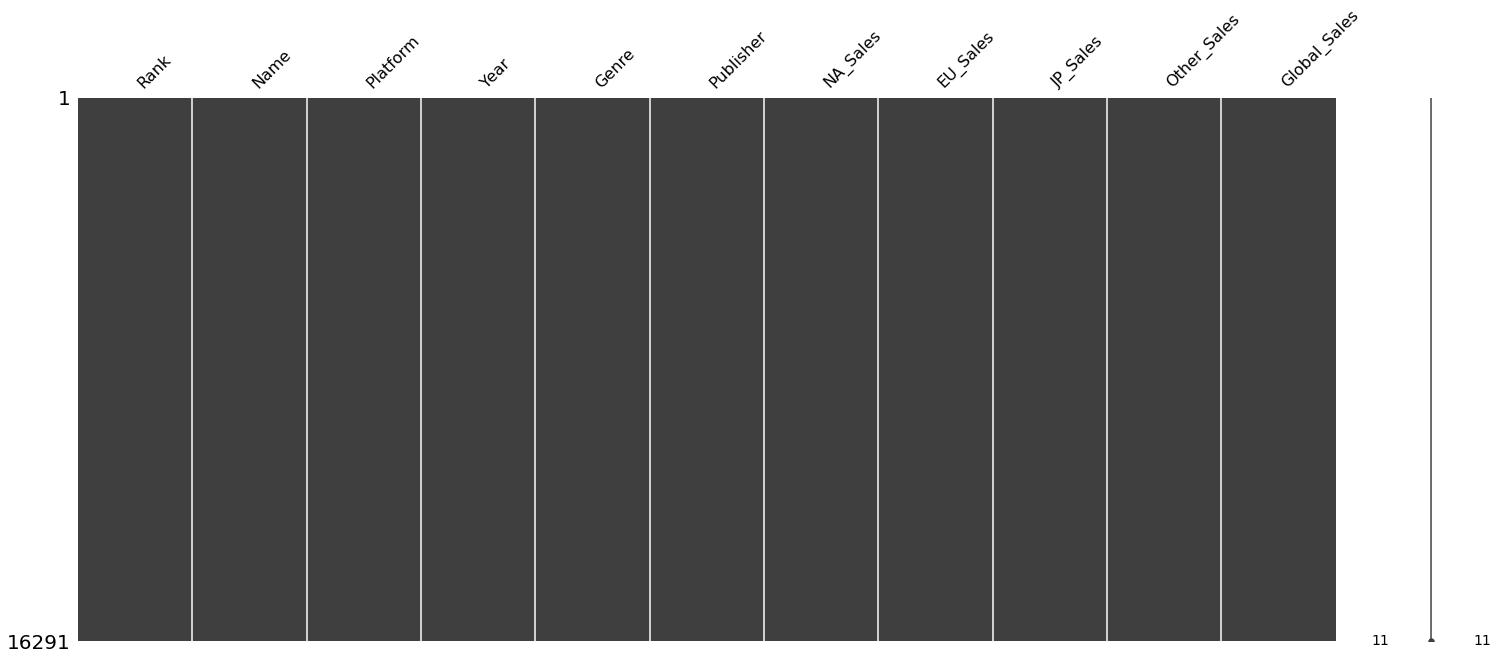

In [7]:
msno.matrix(videogames);

Controllo infine se sono presenti records duplicati:

In [8]:
print("Numero di videogiochi duplicati:\t", videogames[videogames.duplicated()].shape[0], "\nNumero di console duplicate:\t\t", consoles[consoles.duplicated()].shape[0])

Numero di videogiochi duplicati:	 0 
Numero di console duplicate:		 0


### Controllo validità delle vendite globali
Il valore delle vendite globali deve rispettare la seguente equazione:

vendite globali = vendite NA + vendite EU + vendite JP + vendite nel resto del mondo

Controllo prima il minimo valore delle vendite globali presente nel dataset, per poi contare il numero di records che hanno il valore errato delle vendite globali:

In [9]:
min_gs_value = videogames['Global_Sales'].min()
min_gs_value

0.01

In [10]:
test = videogames[videogames['Global_Sales']>min_gs_value]
test[test['Global_Sales'] != test['NA_Sales']+test['EU_Sales']+test['JP_Sales']+test['Other_Sales']].shape[0]

6636

In 6636 records, il valore delle vendite globali di un videogioco è errato.

Procedo quindi a correggere i valori nel dataframe videogames:

In [11]:
videogames['Global_Sales'] = videogames['NA_Sales'] + videogames['EU_Sales'] + videogames['JP_Sales']+videogames['Other_Sales']

Test:

In [12]:
videogames[videogames['Global_Sales'] != videogames['NA_Sales']+videogames['EU_Sales']+videogames['JP_Sales']+videogames['Other_Sales']].shape[0]

0

### Controllo editori con pochi giochi pubblicati
Gli editori che hanno pubblicato pochi giochi potrebbero rendere la media non accurata.
Ad esempio, se un editore avesse pubblicato un solo gioco, la media delle vendite globali di quell'editore sarebbe il valore delle vendite globali del gioco stesso.

Pertanto, controllo in media quanti giochi gli editori hanno pubblicato:

In [13]:
videogames['Publisher'].value_counts().describe()

count     576.000000
mean       28.282986
std       115.417374
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1339.000000
Name: Publisher, dtype: float64

Si può notare che circa il 50% degli editori ha pubblicato 3 o meno videogiochi.

Procedo quindi con la rimozione dei videogiochi assegnati a questi editori:

In [14]:
editori = list(videogames['Publisher'].value_counts()[videogames['Publisher'].value_counts()>3].index)

videogames = videogames[videogames['Publisher'].isin(editori)]

Conto il numero di records attualmente nel database:

In [15]:
videogames['Name'].count()

15797

> Il database pulito e corretto ora contiene 15797 videogiochi ed è pronto per la fase di analisi.

---

## 3: **Analisi esplorativa**
In questa fase verranno analizzati singolarmente i datasets al fine di ricavare informazioni attraverso statistiche e grafici.

### Dataset videogames

**Videogiochi più venduti al mondo:**

In [16]:
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


**Distribuzione vendite dei videogiochi per genere nel mondo:**

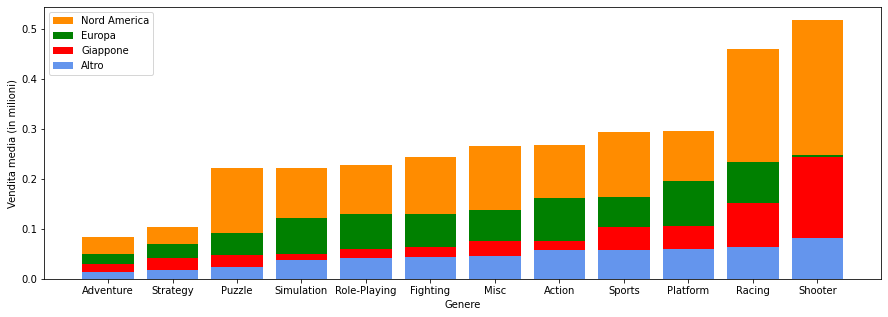

In [17]:
plt.figure(figsize=(15,5))
plt.bar(range(0,12), list(videogames.groupby('Genre')['NA_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['NA_Sales'].mean().sort_values().index), color = 'darkorange', label = 'Nord America')
plt.bar(range(0,12), list(videogames.groupby('Genre')['EU_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['EU_Sales'].mean().sort_values().index), color = 'green', label = 'Europa')
plt.bar(range(0,12), list(videogames.groupby('Genre')['JP_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['JP_Sales'].mean().sort_values().index), color = 'red', label = 'Giappone')
plt.bar(range(0,12), list(videogames.groupby('Genre')['Other_Sales'].mean().sort_values().values), tick_label=list(videogames.groupby('Genre')['Other_Sales'].mean().sort_values().index), color = 'cornflowerblue', label = 'Altro')
plt.legend()
plt.xlabel('Genere')
plt.ylabel('Vendita media (in milioni)')
plt.show();

In media, il genere più venduto è Shooter, ma come mostrato dai prossimi due esempi, questo valore non coincide con il genere più venduto in assoluto nel mondo:

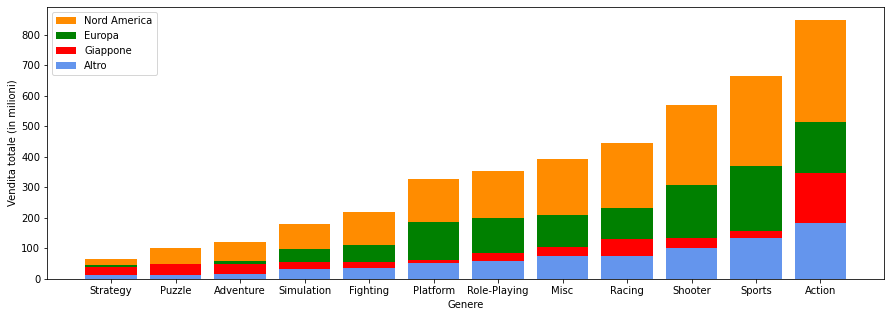

In [18]:
plt.figure(figsize=(15,5))
plt.bar(range(0,12), list(videogames.groupby('Genre')['NA_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['NA_Sales'].sum().sort_values().index), color = 'darkorange', label = 'Nord America')
plt.bar(range(0,12), list(videogames.groupby('Genre')['EU_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['EU_Sales'].sum().sort_values().index), color = 'green', label = 'Europa')
plt.bar(range(0,12), list(videogames.groupby('Genre')['JP_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['JP_Sales'].sum().sort_values().index), color = 'red', label = 'Giappone')
plt.bar(range(0,12), list(videogames.groupby('Genre')['Other_Sales'].sum().sort_values().values), tick_label=list(videogames.groupby('Genre')['Other_Sales'].sum().sort_values().index), color = 'cornflowerblue', label = 'Altro')
plt.legend()
plt.xlabel('Genere')
plt.ylabel('Vendita totale (in milioni)')
plt.show();

Con una rappresentazione a torta possiamo notare la vendita globale per genere:

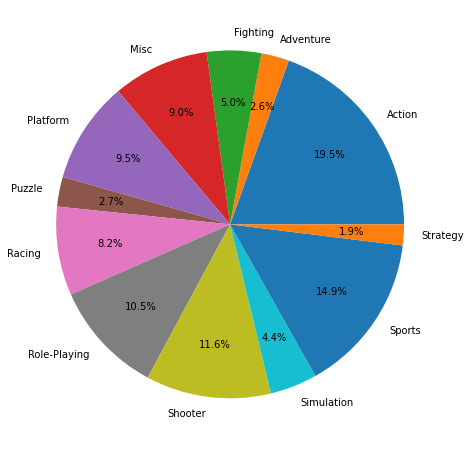

In [19]:
vg = videogames.groupby(['Genre'])['Global_Sales'].sum()

pie, ax = plt.subplots(figsize=[12, 8])
plt.pie(x = vg, autopct="%.1f%%", labels=vg.keys(), pctdistance=0.7)
plt.show();

> Nonostante in media il genere Shooter risulti quello più venduto, nelle vendite globali complessive il genere di videogiochi più venduto è Action.
Questo è dovuto alla forte disparità delle vendite dei singoli videogiochi, i quali abbassano la media complessiva rispetto al totale. Motivo per cui, in questa analisi, il valore della somma totale delle vendite dei videogiochi risulterà il più interessante da studiare.

**Editori con più copie vendute:**

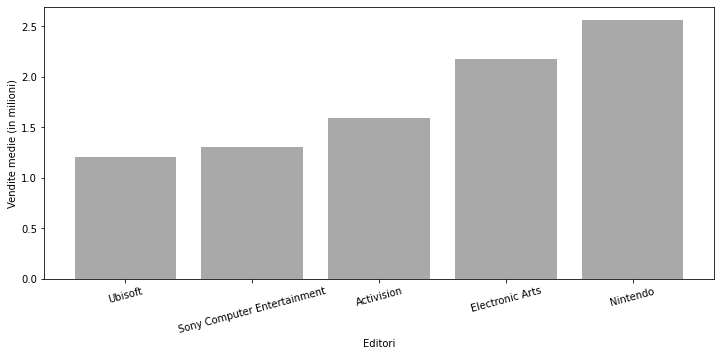

In [20]:
plt.figure(figsize=(12,5))
plt.bar(videogames.groupby('Publisher')['Global_Sales'].sum().sort_values()[-5:].index, videogames.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:].values, color = 'darkgrey')
plt.xlabel('Editori')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

> Nintendo risulta l'editore con più vendite totali.

**Console appartenenti ai videogiochi più venduti:**

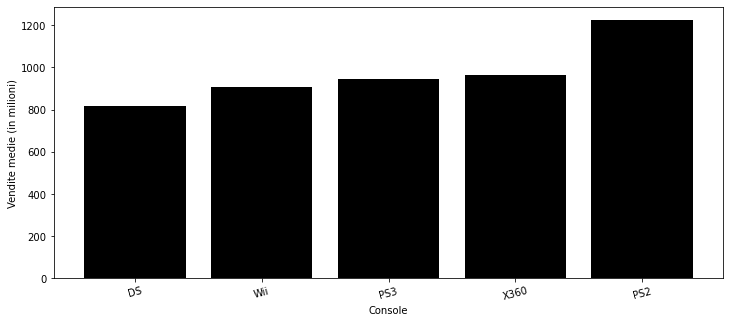

In [21]:
plt.figure(figsize=(12,5))
plt.bar(videogames.groupby('Platform')['Global_Sales'].sum().sort_values()[-5:].index, videogames.groupby('Platform')['Global_Sales'].sum().sort_values()[-5:].values, color='black')
plt.xlabel('Console')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(rotation=15);

> La maggior parte dei videogiochi con più vendite è stato sviluppato per PS2.

>Nella fase di testing verrà cercata una correlazione tra queste informazioni e le consoles più vendute di sempre (che verranno ricavate dal database *Console*).

**Sviluppo di videogiochi nel tempo:**

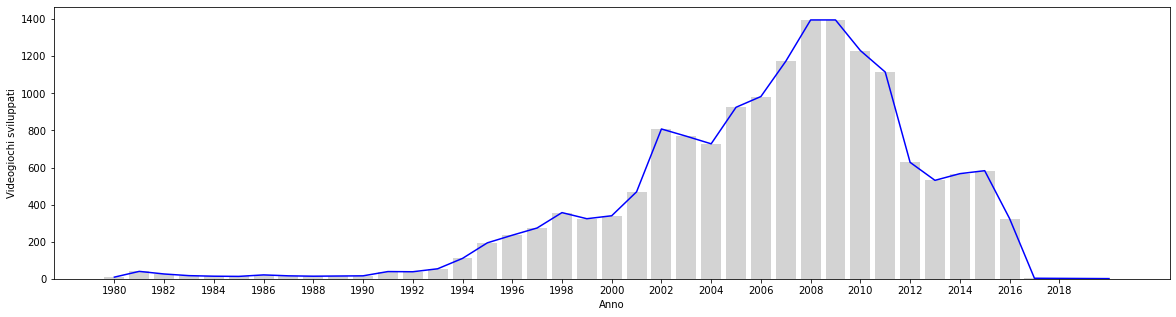

In [98]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

plt.errorbar(videogames.groupby('Year')['Name'].count().index, videogames.groupby('Year')['Name'].count().values, color='blue')
plt.bar(videogames.groupby('Year')['Name'].count().index, videogames.groupby('Year')['Name'].count().values, color='lightgrey')
plt.xlabel('Anno')
plt.ylabel('Videogiochi sviluppati')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.show();

> Si può notare come la distribuzione dello sviluppo di videogiochi aumenti notevolmente dopo gli anni 2000, con un picco negli anni 2008-2009.

**Vendite di videogiochi nel tempo:**

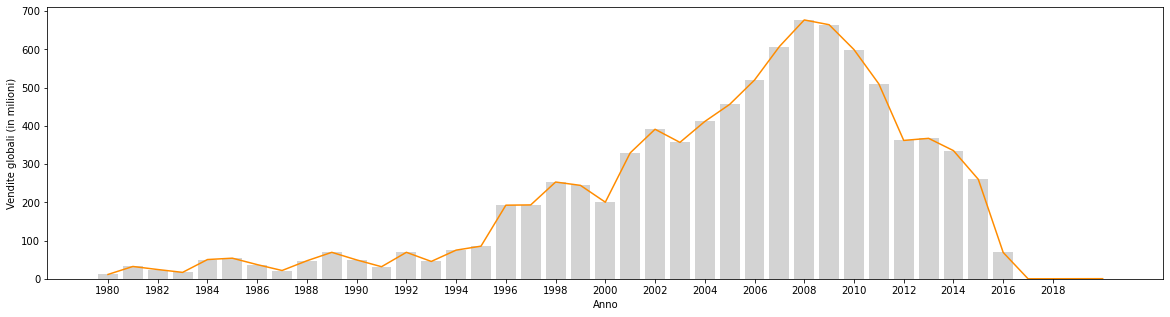

In [100]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

plt.errorbar(videogames.groupby('Year')['Global_Sales'].sum().index, videogames.groupby('Year')['Global_Sales'].sum().values, color='darkorange')
plt.bar(videogames.groupby('Year')['Global_Sales'].sum().sort_values().index, videogames.groupby('Year')['Global_Sales'].sum().sort_values().values, color='lightgray')
plt.xlabel('Anno')
plt.ylabel('Vendite globali (in milioni)')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.show();

> Si può notare che la vendita media dei videogiochi nel tempo ha due picchi tra il 1984 e il 1990.

> Nella fase di testing verrà cercata un'eventuale correlazione tra lo sviluppo dei videogiochi e la vendita dei videogiochi.

I 5 videogiochi più venduti di quel periodo sono i seguenti:

In [24]:
vg = videogames[videogames['Year']>=1984]
vg = vg[vg['Year'] < 1990]
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


> Rispetto alla classifica dei videogiochi più venduti al mondo spicca *Super Mario Bros*, con *Rank* globale 2.

**Relazione tra le vendite dei videogiochi nelle varie parti del mondo:**

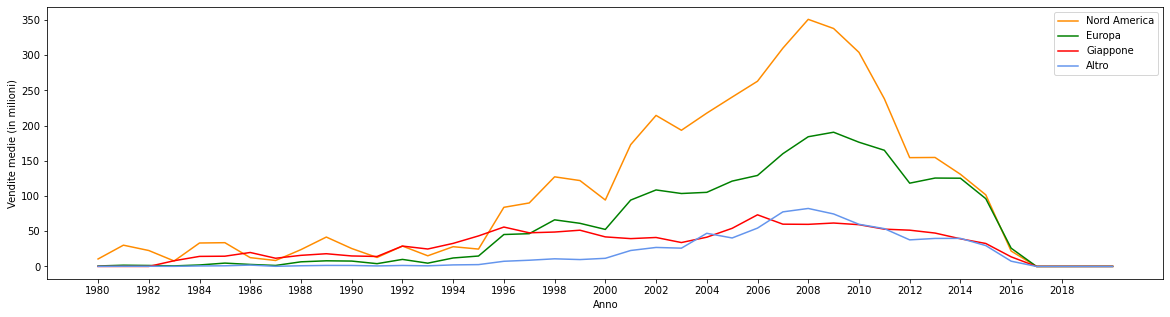

In [25]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

plt.errorbar(videogames['NA_Sales'].groupby(videogames['Year']).sum().index, videogames['NA_Sales'].groupby(videogames['Year']).sum().values, color = 'darkorange', label = 'Nord America')
plt.errorbar(videogames['EU_Sales'].groupby(videogames['Year']).sum().index, videogames['EU_Sales'].groupby(videogames['Year']).sum().values, color = 'green', label = 'Europa')
plt.errorbar(videogames['JP_Sales'].groupby(videogames['Year']).sum().index, videogames['JP_Sales'].groupby(videogames['Year']).sum().values, color = 'red', label = 'Giappone')
plt.errorbar(videogames['Other_Sales'].groupby(videogames['Year']).sum().index, videogames['Other_Sales'].groupby(videogames['Year']).sum().values, color = 'cornflowerblue', label = 'Altro')

plt.xlabel('Anno')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.legend()
plt.show()

> In Nord America si ha il maggior numero di copie vendute di videogiochi rispetto al resto del mondo.

**Relazione tra le migliori 5 piattaforme negli anni:**

Da un'analisi precedente risulta che le consoles appartenenti ai videogiochi più venduti sono le seguenti:
- PS2
- X360
- PS3
- SNES
- PlayStation 4

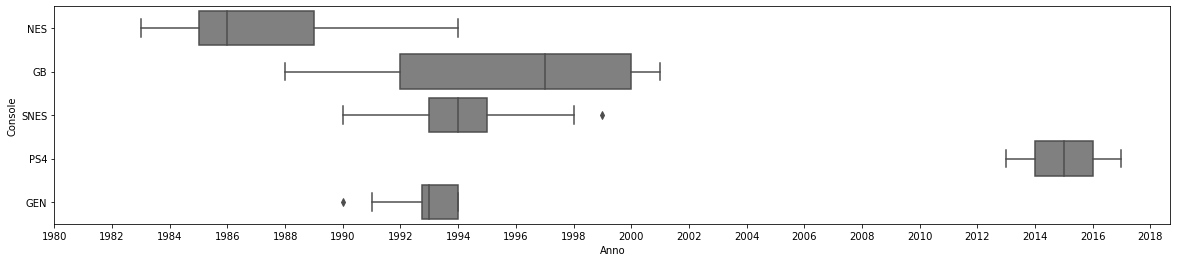

In [26]:
min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

vg = videogames[videogames['Platform'].isin(['PS4', 'SNES', 'GEN', 'NES', 'GB'])]
plt.figure(figsize=(20,4))
sb.boxplot(data = vg, x = 'Year', y = 'Platform', color = 'grey')
plt.xlabel('Anno')
plt.ylabel('Console');
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2));

> Si può notare che, tra le consoles con più videogiochi popolari di sempre, 4 consoles su 5 sono state popolari prima del 2002.

### Dataset consoles

---

## 4: **Testing**


In questa fase verranno ricercate correlazioni tra i dati.

Per farlo, sarà necessario effettuare un merge dei due dataset:

In [85]:
join = videogames.copy()
join = join.merge(consoles, left_on='Platform', right_on='ConsoleID', how='left')

Controllo la struttura del dataframe contenente il merge:

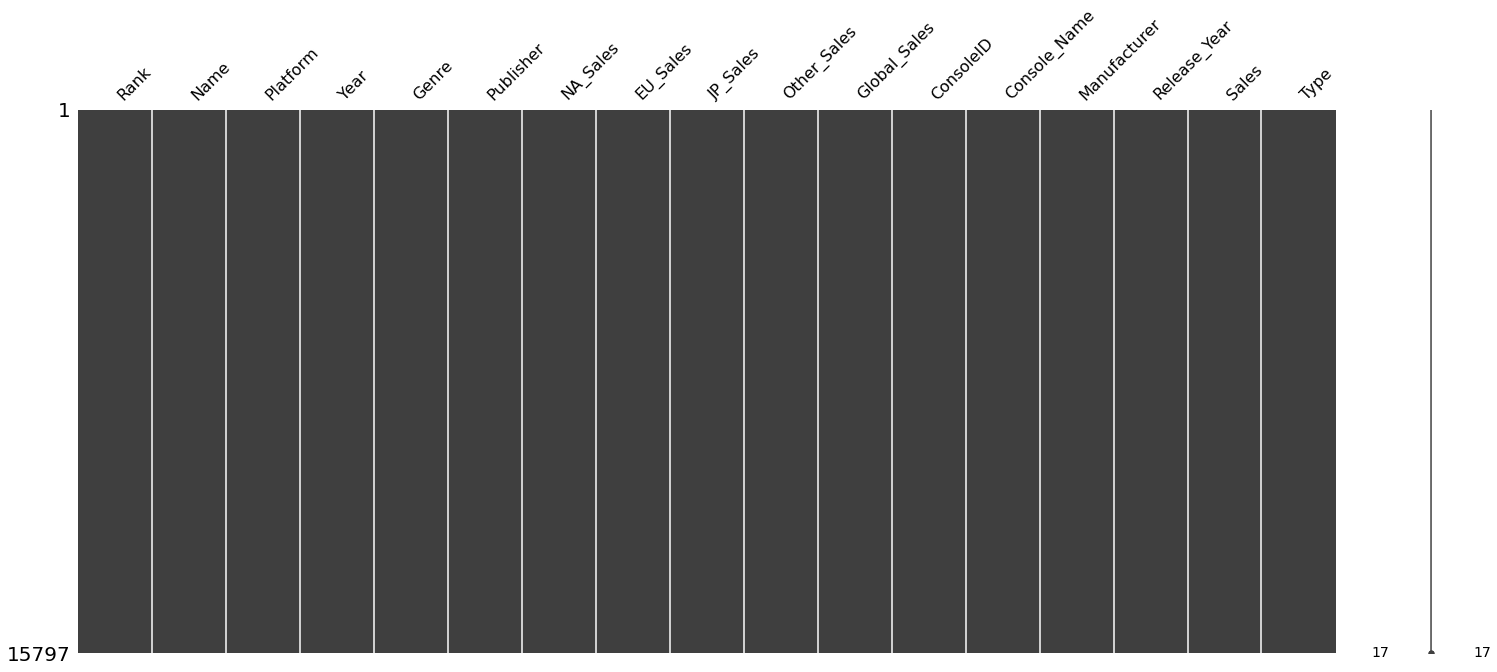

In [86]:
msno.matrix(join);

Il dataframe join non necessita di alcuna pulizia.
Pertanto si può procedere con la fase di testing.

### Calcolo correlazione tra le vendite dei videogiochi nelle varie regioni
Voglio capire se tutti le regioni prese in considerazione (Nord America, Europa, Giappone e il resto del mondo) seguono lo stesso trend di vendite di videogiochi, o se una si differenzia dal trend comune. Per farlo, inizio con il visualizzare in una heatmap le relazioni presenti nel dataframe join contenente il merge dei due datasets iniziali:

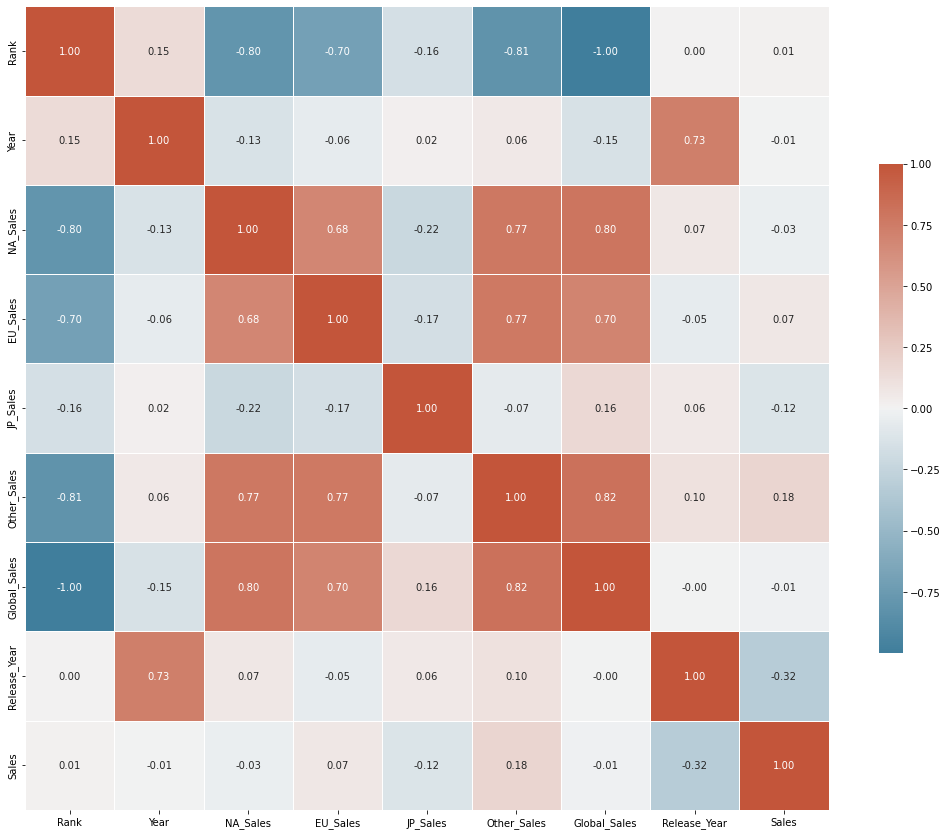

In [128]:
corr = join.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.zeros_like(corr, dtype=bool)

cmap = sb.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(18, 18))
ax = sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f");

> Come si può notare dalla matrice di correlazione, sembra che il Giappone presenti la correlazione minore rispetto alle vendite globali.

Possiamo studiare la correttezza di questa ipotesi guardando la sovrapposizione delle vendite dei videogiochi nelle varie regioni:

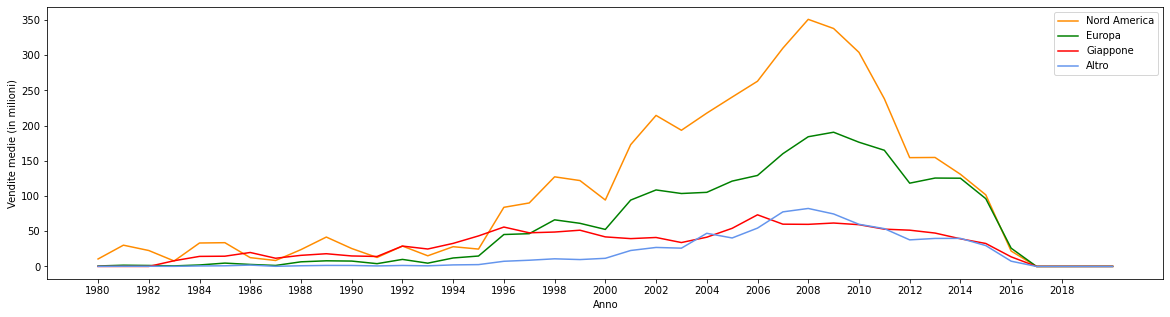

In [28]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

plt.errorbar(videogames['NA_Sales'].groupby(videogames['Year']).sum().index, videogames['NA_Sales'].groupby(videogames['Year']).sum().values, color = 'darkorange', label = 'Nord America')
plt.errorbar(videogames['EU_Sales'].groupby(videogames['Year']).sum().index, videogames['EU_Sales'].groupby(videogames['Year']).sum().values, color = 'green', label = 'Europa')
plt.errorbar(videogames['JP_Sales'].groupby(videogames['Year']).sum().index, videogames['JP_Sales'].groupby(videogames['Year']).sum().values, color = 'red', label = 'Giappone')
plt.errorbar(videogames['Other_Sales'].groupby(videogames['Year']).sum().index, videogames['Other_Sales'].groupby(videogames['Year']).sum().values, color = 'cornflowerblue', label = 'Altro')

plt.xlabel('Anno')
plt.ylabel('Vendite medie (in milioni)')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.legend()
plt.show()

> Mentre Nord America, Europa e le altre nazioni prese in considerazione procedono con la stessa monotonia se pur con tassi di vendite differenti, il Giappone risulta molto più lineare, non seguendo la stessa monotonia delle altre regioni.

Visualizzo ora la correlazione tra le singole regioni prese in considerazione rispetto alle vendite globali utilizzando la regressione lineare:

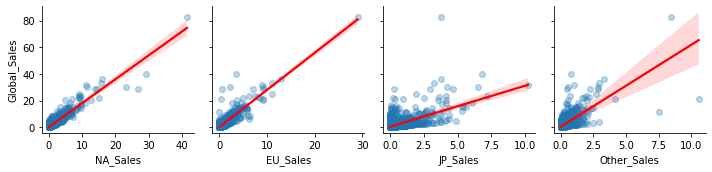

In [136]:
cor_gr = sb.PairGrid(join, x_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], y_vars=['Global_Sales']);
cor_gr.map(sb.regplot, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'});
plt.tight_layout()
plt.show()

> Si conferma che le vendite dei videogiochi in Giappone risultano seguire un trend diverso rispetto alle vendite nelle altre regioni. Questo è dovuto alla particolare e atipica cultura videoludica del Giappone.

### Calcolo della correlazione monotona tra la vendita di una console e la vendita dei videogiochi sviluppati per la stessa console


Di base si può pensare che, come conseguenza dell'aumentare delle vendite di una console, aumentino anche le vendite dei videogiochi sviluppati per quella console.

> Il PC, nonostante risieda al primo posto della classifica, non può essere utilizzato, poiché non è possibile contare quanti PC sono stati venduti al mondo, difatti il valore delle vendite assegnato al PC (1 miliardo) è un valore fittizio, in quanto rappresenta un valore maggiore di qualunque altra console.
Viene quindi rimosso dall'analisi.

Parto con l'estrarre dal dataset *console* le consoles più vendute al mondo:


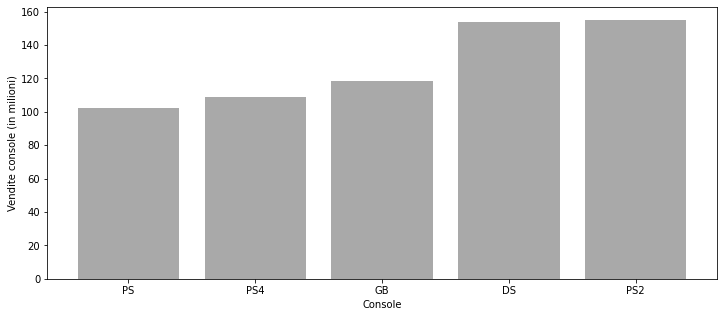

In [169]:
plt.figure(figsize=(12,5))
plt.bar(consoles.groupby('ConsoleID')['Sales'].sum().sort_values()[-6:-1].index, consoles.groupby('ConsoleID')['Sales'].sum().sort_values()[-6:-1].values, color='darkgrey', label='Vendite consoles')
plt.xlabel('Console')
plt.ylabel('Vendite console (in milioni)')
plt.show();

Le console più vendute nel mondo sono le seguenti:
- Play Station 2
- Nintendo DS
- GameBoy
- Play Station 4
- Play Station

Controllo manualmente la media delle vendite dei videogiochi associati a queste console e sovrappongo i risultati ottenuti per controllarne la monotonia (elevo al quadrato le medie per esaltarne la monotonia):

In [161]:
videogames.groupby('Platform')['Global_Sales'].mean().sort_values().tail(25)


Platform
SAT     0.204416
WS      0.236667
PSP     0.248811
PC      0.277847
SCD     0.310000
XB      0.317224
DC      0.317400
GC      0.364249
GBA     0.391682
DS      0.391798
3DS     0.505528
WiiU    0.575211
PS2     0.592443
PS      0.632431
XOne    0.687304
N64     0.702370
Wii     0.710563
PS3     0.734143
2600    0.784100
X360    0.792666
PS4     0.860881
SNES    0.921925
GEN     0.978750
NES     2.594737
GB      2.673579
Name: Global_Sales, dtype: float64

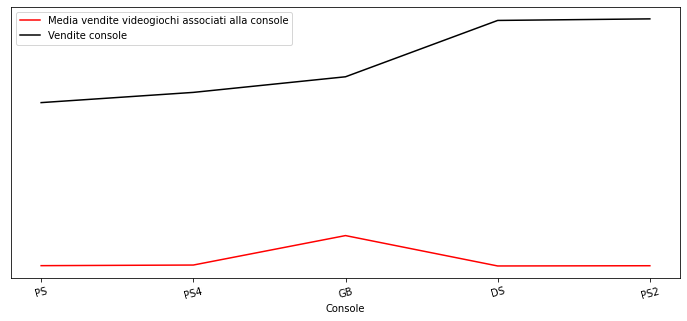

In [191]:
plt.figure(figsize=(12,5))
plt.errorbar(['PS', 'PS4', 'GB', 'DS', 'PS2'], [0.632431**3, 0.860881**3, 2.673579**3, 0.391798**3, 0.592443**3], color='red', label='Media vendite videogiochi associati alla console')
plt.errorbar(consoles.groupby('ConsoleID')['Sales'].mean().sort_values()[-6:-1].index, consoles.groupby('ConsoleID')['Sales'].mean().sort_values()[-6:-1].values, color='black', label='Vendite console')
plt.xlabel('Console')
plt.legend()
plt.xticks(rotation=15)
plt.yticks([])
plt.show();

> Si nota che non vi è alcuna correlazione tra le vendite di una console e la media delle vendite dei videogiochi associate a quella console.

### Calcolo correlazione monotona tra lo sviluppo di videogiochi e le vendite di videogiochi


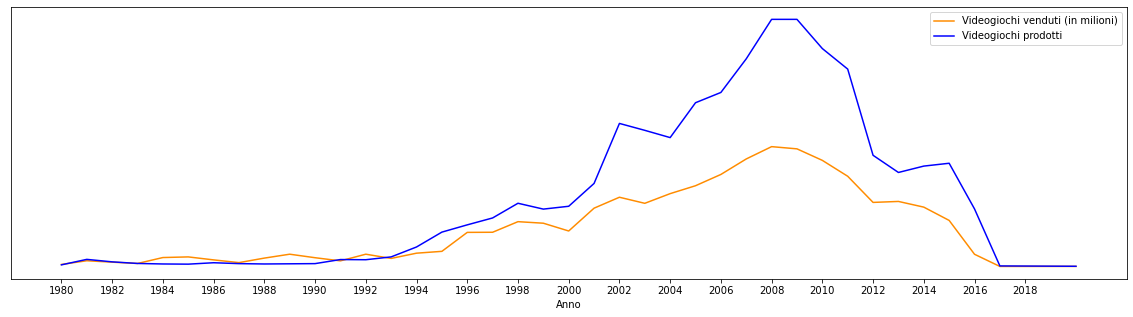

In [168]:
plt.figure(figsize=(20,5))

min_year = int(videogames['Year'].min())
max_year = int(videogames['Year'].max())

# vendite totali videogiochi negli anni
plt.errorbar(videogames.groupby('Year')['Global_Sales'].sum().index, videogames.groupby('Year')['Global_Sales'].sum().values, color='darkorange', label='Videogiochi venduti (in milioni)')
# numero totale di videogiochi prodotti negli anni
plt.errorbar(videogames.groupby('Year')['Name'].count().index, videogames.groupby('Year')['Name'].count().values, color='blue', label='Videogiochi prodotti')

plt.xlabel('Anno')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.yticks([])
plt.legend()
plt.show();

---

## 5: **Risultati e conclusioni**
